In [3]:
import numpy as np
import pandas as pd
from pandas import ExcelFile
from pandas import ExcelWriter
import matplotlib.pyplot as pt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [4]:

obs = np.array([17,42,26,22,17,14,10,29,28,17,9,15,18])
sim = np.array([16.4,40,33,24,15,16,17,28,19,10,11,11,13])


def NSE(obs: list, sim: list) -> float:
    denominator = np.sum((obs-np.mean(obs))**2)
    numerator = np.sum((obs-sim)**2)
    NSE = 0
    if denominator == 0:
        print("Error: denominator is '0'.")
        
    else:
        NSE = 1 - (numerator/denominator)
        NSE = round(NSE,3)
        return NSE



def PBIAS(obs: list, sim: list) -> float:
    denominator = np.sum(obs)
    numerator = np.sum(sim-obs)
    if denominator == 0:
        print("Error: denominator is '0'.")
    else:
        pbias = 100*(numerator/denominator)
        pbias = round(pbias,3)
    return pbias


def R2(obs: list, sim: list) -> float:
    corr = np.corrcoef(obs,sim)
    corr = corr[0,1]
    R2 = round(corr**2,3)
    return R2

def RMSE(obs: list, sim: list) -> float:
    RMSE = np.sqrt(((sim-obs)**2).mean())
    print("RMSE:")
    return RMSE



In [5]:
# Read data file (excel)
sample =  pd.read_excel('sample.xlsx',sheet_name='Sheet1', engine='openpyxl')
obs = sample['obs']
sim = sample['sim']

RMSE(obs,sim)

RMSE:


7.64750424552198

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

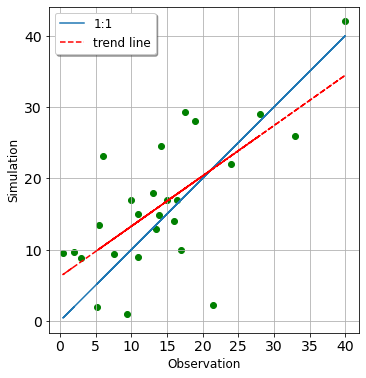

In [14]:
pt.figure(figsize= (6,6))
pt.grid()
pt.gca().set_aspect("equal")

pt.scatter(obs,sim, color='g')
pt.plot(obs,obs,label = '1:1')

z = np.polyfit(obs,sim,1)
p = np.poly1d(z)
pt.plot(obs,p(obs),"r--",label='trend line')

pt.xlabel("Observation", fontsize='large')
pt.ylabel("Simulation", fontsize='large')
pt.legend(loc='best')

pt.legend(loc='best',shadow=True, fontsize='large')
pt.xticks(fontsize=14)
pt.yticks(fontsize=14)

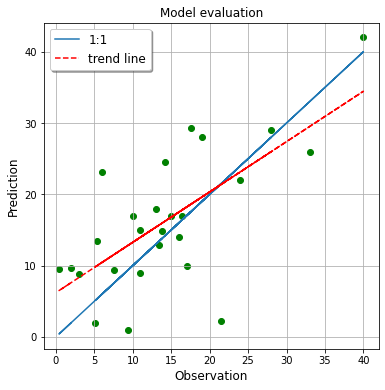

In [45]:
fig, ax = pt.subplots(figsize= (6,6))
ax.grid()
ax.scatter(obs,sim, color='g')
ax.plot(obs,obs,label = '1:1')
z = np.polyfit(obs,sim,1)
p = np.poly1d(z)
ax.plot(obs,p(obs),"r--",label='trend line')

# ax.xlabel("Observation", fontsize='large')
ax.set_xlabel('Observation',fontsize='large')
ax.set_ylabel('Prediction',fontsize='large')
ax.set_title('Model evaluation')
ax.legend(loc='best',shadow=True, fontsize='large')
# ax.xticks(fontsize=14)
# ax.yticks(fontsize=14)

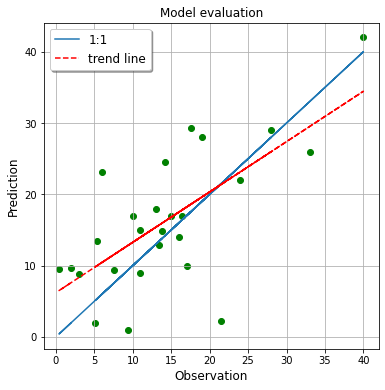

In [46]:
fig

In [9]:
print(type(sample['Date']))
sample['Date'] = pd.to_datetime(sample['Date'])
print(type(sample['Date']))


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

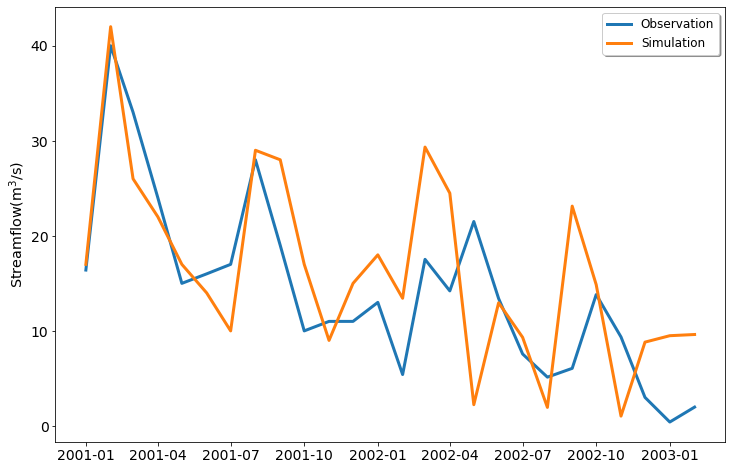

In [10]:
sample_data =  pd.read_excel('sample.xlsx',sheet_name='Sheet1', engine='openpyxl')

# sns.scatterplot(x='obs',y='sim',data=sample_data)
# line, ax = pt.subplots()
# ax = 
pt.figure(figsize= (12,8))
sns.lineplot(x='Date',y='obs',data=sample_data,label = "Observation",linewidth=3)
sns.lineplot(x='Date',y='sim',data=sample_data, label = 'Simulation',linewidth=3)
pt.xlabel("")
pt.ylabel("Streamflow(m$^3$/s)", fontsize='x-large')
pt.legend(loc='best',shadow=True, fontsize='large')
pt.xticks(fontsize=14)
pt.yticks(fontsize=14)

In [11]:
from tkinter import *
# from PIL import ImageTK, Image
from tkinter import filedialog

import os



In [ ]:
data_path = filedialog.askopenfilename()
filename, file_extension = os.path.splitext(data_path)

print(".csv"==file_extension)

data_path

In [ ]:
print(NSE([0]*len(sim), sim))

In [53]:
import plotly.graph_objects as go

data_path = r"E:\03_Codes\02_codable_2021\backend\Model_eval\streamflow_andong.csv"
data =  pd.read_csv(data_path)
data['Date'] = pd.to_datetime(data['Date'])   #Read date
date = data['Date']
obs = data['obs']
sim = data['sim']

fig = go.Figure([go.Scatter(x=date, y=obs)])
fig = go.Figure([go.Scatter(x=date, y=sim)])
fig.show()

In [56]:
import plotly.express as px

fig = px.line(data, x="Date", y=data.columns,
              hover_data={"Date": "|%B %d, %Y"},
              title='custom tick labels')
fig.update_xaxes(
    dtick="M6",
    tickformat="%m\n%Y")
fig.show()

data

,Date,obs,sim
0,2011-01-02,2.46,4.1830
1,2011-01-03,2.40,4.1860
2,2011-01-04,0.82,3.8970
3,2011-01-05,2.42,3.5950
4,2011-01-06,2.20,3.7150
...,...,...,...
1820,2015-12-27,7.08,0.6620
1821,2015-12-28,4.06,0.6117
1822,2015-12-29,0.99,0.8948
1823,2015-12-30,4.04,1.0800


In [ ]:
# import plotly.express as px
# df = px.data.stocks()
# fig = px.line(df, x="date", y=df.columns,
#               hover_data={"date": "|%B %d, %Y"},
#               title='custom tick labels with ticklabelmode="period"')
# fig.update_xaxes(
#     dtick="M1",
#     tickformat="%b\n%Y",
#     ticklabelmode="period")
# fig.show()

In [ ]:
# df = px.data.iris()
# df

In [ ]:
# # df = px.data.iris()
# fig = px.scatter(data, x="obs", y="sim")
# fig.show()

# data

In [ ]:
# import plotly.graph_objects as go
# import pandas as pd

# data_path = r"E:\03_Codes\02_codable_2021\backend\Model_eval\streamflow_andong.csv"
# data =  pd.read_csv(data_path)
# data['Date'] = pd.to_datetime(data['Date'])   #Read date
# date = data['Date']
# obs = data['obs']
# sim = data['sim']

# fig = go.Figure(data=go.Scatter(x=obs,
#                                 y=sim,
#                                 mode='markers',
# #                                 marker_color=data['Population'],
#                                 text=date)) # hover text goes here
# fig.show()

In [ ]:
# sample = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv")
# sample 

In [ ]:
fig, ax = 